# 선형회귀

In [1]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

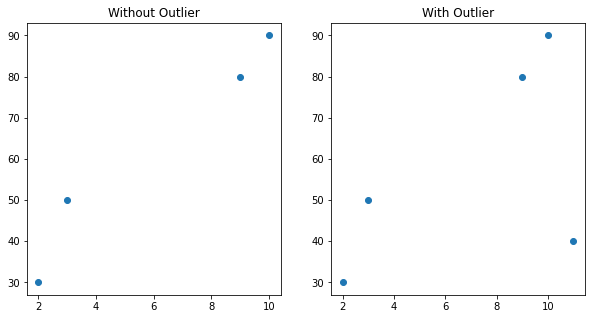

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

## 최소제곱법

In [3]:
# 최소 제곱법 구현

def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [4]:
# w: 기울기, b: 편향

w1, b1 = OLS(x1,y1)
w2, b2 = OLS(x2,y2)
w1,b1,w2,b2         

(6.6, 22.900000000000006, 3.4285714285714284, 34.0)

In [5]:
# 예측값
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2
x1_pred, x2_pred

(array([88.9, 82.3, 42.7, 36.1]),
 array([68.28571429, 64.85714286, 44.28571429, 40.85714286, 71.71428571]))

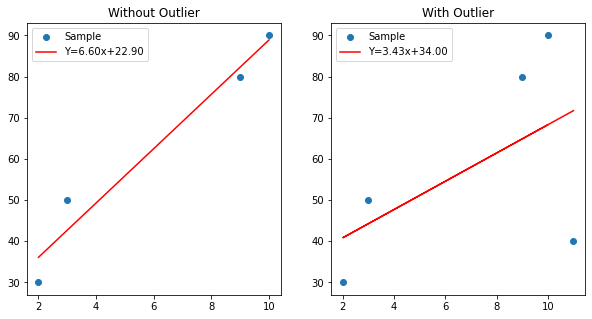

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')                             # 점 그래프
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')   # 선 그래프
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(x1.reshape(-1,1), y1)    # reshape를 하는 이유 : fit할때 x는 2차원으로, y는 일차원 (fit([x1], y1))
model2 = LinearRegression().fit(x2.reshape(-1,1), y2)

print(model1.coef_, model1.intercept_)
print(model2.coef_, model2.intercept_)

[6.6] 22.899999999999984
[3.42857143] 33.99999999999999


# 1 보스턴 집값 데이터셋

In [39]:
import warnings
warnings.filterwarnings(action='ignore') 

from sklearn.datasets import load_boston

boston = load_boston()
# boston -> DataFrame 으로 변환보면 익숙함
import pandas as pd
boston_df = pd.DataFrame(
    boston["data"],
    columns=boston["feature_names"]
)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [40]:
boston_df["price"] = boston["target"] #집값
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# 2. train과 test로 분할 전 fit시키기
Y = boston_df['price']
X = boston_df.drop(columns = 'price')

# 표준화 - X 전체
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)     # X전체를 fit 시킴

x_tr, x_te, y_tr, y_te = train_test_split(
    X_sc, Y, random_state = 100      # 선형분석에서는 stratify 사용 불가
)

model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)


## 분할하기 전, X 전체에 fit을 시키는 것이 효율적

NameError: name 'train_test_split' is not defined

In [ ]:
# 1. train과 test로 분할 후 fit시키기

Y = boston_df['price']
X = boston_df.drop(columns = 'price')

from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(
    X, Y, random_state = 100      # 선형분석에서는 stratify 사용 불가
)

# 표준화 - X_tr과 X_te를 나누어 fit
x_tr_sc = scaler.fit_transform(x_tr)    # train과 test를 나눈 후 fit 시킴
x_te_sc = scaler.transform(x_te)

model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

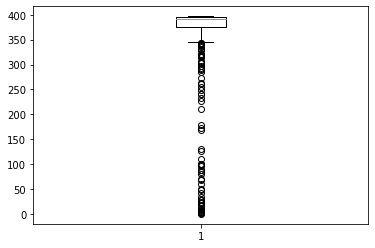

In [41]:
import matplotlib.pyplot as plt
#plt.boxplot(boston["data"])
plt.boxplot(boston_df["B"])
plt.show()

In [42]:
Q1 = boston_df["B"].quantile(0.25)
Q3 = boston_df["B"].quantile(0.75)
IQR = Q3 - Q1
MAX = Q3 + 1.5*IQR
MIN = Q1 - 1.5*IQR
MIN, MAX

(344.10624999999993, 427.49625000000003)

In [43]:
target = boston_df["B"][
    (boston_df["B"]<MIN) | (boston_df["B"]>MAX)
]
target

18     288.99
25     303.42
27     306.38
32     232.60
34     248.31
        ...  
466     22.01
467    331.29
475    302.76
489    344.05
490    318.43
Name: B, Length: 77, dtype: float64

In [44]:
boston_df = boston_df.drop(target.index)

In [14]:
# 선형회귀 모델링
y = boston_df["price"]
X = boston_df.drop(columns="price")

# #표준화
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# #X_sc = scaler.fit_transform(X) 
# #이렇게 X전체를 표준화 하기도 함

# x_tr_sc = scaler.fit_transform(x_tr)
# x_te_sc = scaler.transform(x_te)

# #정규화
# from sklearn.preprocessing import MinMaxScaler


In [15]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X, y, random_state=100, #stratify=y
)
# stratify=y 옵션 주면 안됨. 종류가 아니라 회귀값임

In [16]:
# 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr) , model.score(x_te, y_te)


(0.7333970447189131, 0.7605037585652703)

### 이상치 확인 및 제거

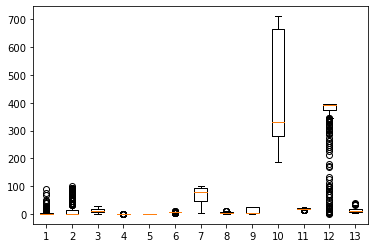

In [17]:
import matplotlib.pyplot as plt

plt.boxplot(boston['data'])
plt.show()

In [45]:
Q1 = boston_df['B'].quantile(0.25)
Q3 = boston_df['B'].quantile(0.75)
IQR = Q3 - Q1
MAX = Q3 + 1.5 * IQR
MIN = Q1 - 1.5 * IQR
MAX, MIN

(413.3849999999999, 369.42500000000007)

In [46]:
target = boston_df['B'][
    (boston_df['B'] < MIN) | (boston_df['B'] > MAX)
]
target

30     360.17
33     358.77
95     357.98
115    344.91
126    359.29
148    356.99
149    351.85
157    363.43
158    353.89
159    364.31
166    369.30
171    348.13
197    354.31
214    348.93
234    360.20
298    368.24
310    350.45
330    368.57
332    362.25
346    364.61
361    350.65
363    353.04
364    354.55
365    354.70
371    366.15
372    347.88
376    363.02
451    355.29
468    368.74
474    352.58
477    349.48
Name: B, dtype: float64

In [47]:
boston_df = boston_df.drop(target.index)    # 행삭제
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


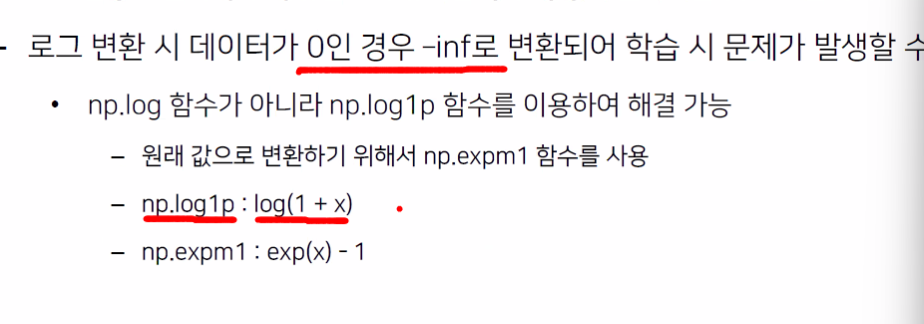

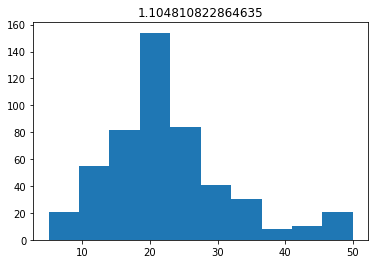

In [21]:
# 로그 변환
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

plt.hist(boston["target"])
plt.title(f"{skew(boston['target'])}")
plt.show()

In [62]:
Y = boston_df['price']
X = boston_df.drop(columns = 'price')

x_tr, x_te, y_tr, y_te = train_test_split(
    X, Y, random_state = 100      # 선형분석에서는 stratify 사용 불가
)

model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

# tr ↓ te ↑ : 좋은결과 (tr_score < te_score)

(0.8247364211150574, 0.6724948476035582)

## 1.1 경사하강법

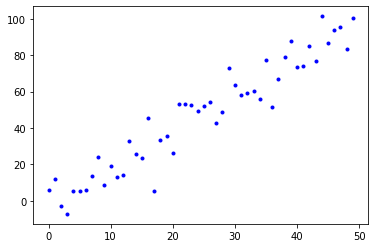

In [63]:
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')

In [64]:
X = X.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,Y)
model.score(X,Y)
model.coef_, model.intercept_

(array([2.01198119]), -2.2593767508230584)

In [65]:
pred = model.predict(X) #예측값

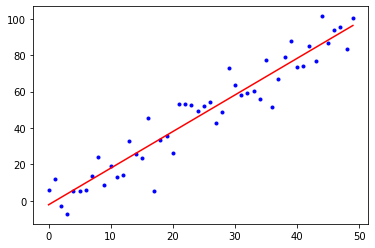

In [66]:
plt.plot(X, Y, 'b.')
plt.plot(X, pred, 'r-')

## 1.2 다향변환

In [67]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(5).reshape(-1, 1)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [70]:
P = PolynomialFeatures(degree=2, include_bias=False)
x_poly = P.fit_transform(boston_df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(
    x_poly, boston_df["price"], random_state=0)
boston_df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((398, 13), (398, 104))

In [71]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9583625094934584, 0.9025729796177037)